In [1]:
import numpy, seaborn, pandas
import scipy.stats as stats
from scipy.stats import gaussian_kde
import matplotlib, matplotlib.pyplot as plt

import re #to search

C:\Users\kja11\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width: 90% !important; }</style>"))

In [3]:
file_directory = "/Users/kja11/OneDrive - Menntaský (1)/Mild_Hypothermia_project/in_silico/Python/"

input_path = "1) input/flow_cytometry/"
output_path = "3) output/flow_cytometry/"

# Data download and modifications

## Meta and statitics data

In [4]:
experiment = 'ribosome experiment n°1'

In [5]:
# Meta data, important for sample_name
df_meta = pandas.read_csv(file_directory + input_path + 'ribosome_exp1_flowjo_table.csv', sep = ',')

# Interested in name and Mode (the most frequently occurring value)
df_meta = df_meta.rename(columns = {'Unnamed: 0' : 'sample_name',
                                    'HEK293/Single Cells | Geometric Mean (FL3-A :: mCherry-A)' : 'gMFI'})
print(df_meta.shape, '\n')
df_meta.tail(5)

(27, 3) 



,sample_name,HEK293/Single Cells | Count,gMFI
22,37SP1 rpl6a _Data Source - 1.fcs,46144,8000
23,37sp1 ctl_Data Source - 1.fcs,52403,7129
24,Unstained_Data Source - 1.fcs,48806,248
25,Mean,47321,12528
26,SD,14550,11539


In [6]:
# remove the last rows
df_meta = df_meta[(df_meta['sample_name'] != 'Mean') & (df_meta['sample_name'] != 'SD')]
df_meta.tail()

,sample_name,HEK293/Single Cells | Count,gMFI
20,37 sp1 rpl6b_Data Source - 1.fcs,49672,8362
21,37 sp1 rpl40_Data Source - 1.fcs,43810,9228
22,37SP1 rpl6a _Data Source - 1.fcs,46144,8000
23,37sp1 ctl_Data Source - 1.fcs,52403,7129
24,Unstained_Data Source - 1.fcs,48806,248


In [7]:
# Have to rename the samples to have clear labelling  
sample_name = df_meta.sample_name

# select the three meta info
df_meta['Temperature'] = sample_name.apply(lambda x: re.search(r'(32|37)', x).group()
                                           if re.search(r'(32|37)', x) 
                                           else None)

df_meta['mhi-target'] = sample_name.apply(lambda x: re.search(r'(rbm3|sp1|cirbp)', x, re.IGNORECASE).group().lower()
                                           if re.search(r'(rbm3|sp1|cirbp)', x, re.IGNORECASE) 
                                           else None)

df_meta['condition'] = sample_name.apply(lambda x: re.search(r'(Unstained|ctl|rpl6a|rpl6b|rpl40)', x, re.IGNORECASE).group()
                                          if re.search(r'(Unstained|ctl|rpl6a|rpl6b|rpl40)', x, re.IGNORECASE) 
                                          else None)

df_meta.loc[df_meta['condition'] == 'Unstained', ['mhi-target', 'Temperature']] = ['HEK293', 'control']

df_meta

,sample_name,HEK293/Single Cells | Count,gMFI,Temperature,mhi-target,condition
0,32 cirbp ctl_Data Source - 1.fcs,51109,29848,32,cirbp,ctl
1,32 cirbp rpl6a_Data Source - 1.fcs,48554,30016,32,cirbp,rpl6a
2,32 cirbp rpl6b_Data Source - 1.fcs,67407,30621,32,cirbp,rpl6b
3,32 cirbp rpl40_Data Source - 1.fcs,40015,32088,32,cirbp,rpl40
4,32 rbm3 ctl_Data Source - 1.fcs,50269,2516,32,rbm3,ctl
5,32 rbm3 rpl6a_Data Source - 1.fcs,74879,2480,32,rbm3,rpl6a
6,32 rbm3 rpl6b_Data Source - 1.fcs,49803,2374,32,rbm3,rpl6b
7,32 rbm3 rpl40_Data Source - 1.fcs,24489,2370,32,rbm3,rpl40
8,32 sp1 ctl_Data Source - 1.fcs,50077,7650,32,sp1,ctl
9,32 sp1 rpl6b_Data Source - 1.fcs,49300,8066,32,sp1,rpl6b


In [8]:
# to not have None and create a clean label
label_serie = df_meta[['mhi-target', 'condition', 'Temperature']].agg('_'.join, axis=1)
df_meta.insert(0, "label", label_serie)
df_meta.head()

,label,sample_name,HEK293/Single Cells | Count,gMFI,Temperature,mhi-target,condition
0,cirbp_ctl_32,32 cirbp ctl_Data Source - 1.fcs,51109,29848,32,cirbp,ctl
1,cirbp_rpl6a_32,32 cirbp rpl6a_Data Source - 1.fcs,48554,30016,32,cirbp,rpl6a
2,cirbp_rpl6b_32,32 cirbp rpl6b_Data Source - 1.fcs,67407,30621,32,cirbp,rpl6b
3,cirbp_rpl40_32,32 cirbp rpl40_Data Source - 1.fcs,40015,32088,32,cirbp,rpl40
4,rbm3_ctl_32,32 rbm3 ctl_Data Source - 1.fcs,50269,2516,32,rbm3,ctl


In [9]:
# Calculate Geometric mean fluorescence ratio
gMFI_control = df_meta[df_meta.label == 'HEK293_Unstained_control']['gMFI'].iloc[0]
df_meta = df_meta.assign(gMFI_ratio = (df_meta.gMFI/gMFI_control))

# Add SampleID to merge with the flow data
df_meta['SampleID'] = ''
df_meta['SampleID'] = range(1, len(df_meta) + 1)
df_meta = df_meta[['label','SampleID', 'gMFI_ratio']]
df_meta.head()

,label,SampleID,gMFI_ratio
0,cirbp_ctl_32,1,120.354839
1,cirbp_rpl6a_32,2,121.032258
2,cirbp_rpl6b_32,3,123.471774
3,cirbp_rpl40_32,4,129.387097
4,rbm3_ctl_32,5,10.145161


## Flow data

In [10]:
#data Flow Cytometry
df = pandas.read_csv(file_directory + input_path + 'ribosome_exp1_flowjo.csv', sep = ',')

print(df.shape, '\n')
df

(1183032, 9) 



,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,mCherry-A,TIME,SampleID
0,140005.0,79870.6,185,163574.0,92223.0,185,40725.000,0.000000,1
1,443302.0,139324.0,399,376421.0,139712.0,399,25782.100,0.006069,1
2,199014.0,101651.0,225,376082.0,139754.0,225,1486.950,0.006103,1
3,119404.0,79936.6,171,259096.0,147420.0,171,2700.130,0.006103,1
4,154261.0,68945.0,205,318481.0,134052.0,205,921.808,0.006126,1
...,...,...,...,...,...,...,...,...,...
1183027,84705.9,64424.6,141,94655.0,76604.6,141,154.804,36.208900,25
1183028,357484.0,174274.0,315,286361.0,134324.0,315,413.687,36.372700,25
1183029,386943.0,131783.0,348,478741.0,215778.0,348,905.292,36.449100,25
1183030,177393.0,91128.8,219,232522.0,103218.0,219,365.099,36.465800,25


In [11]:
print(f'Amount of SampleID: {df.SampleID.max()}')
print(f'Amount of meta-info label: {len(df_meta.label.unique())}')

Amount of SampleID: 25
Amount of meta-info label: 25


## Merge

In [12]:
# merge 
df = df_meta.merge(df)
df = df.drop(['SampleID', 'TIME'], axis=1)
df

,label,gMFI_ratio,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,mCherry-A
0,cirbp_ctl_32,120.354839,140005.0,79870.6,185,163574.0,92223.0,185,40725.000
1,cirbp_ctl_32,120.354839,443302.0,139324.0,399,376421.0,139712.0,399,25782.100
2,cirbp_ctl_32,120.354839,199014.0,101651.0,225,376082.0,139754.0,225,1486.950
3,cirbp_ctl_32,120.354839,119404.0,79936.6,171,259096.0,147420.0,171,2700.130
4,cirbp_ctl_32,120.354839,154261.0,68945.0,205,318481.0,134052.0,205,921.808
...,...,...,...,...,...,...,...,...,...
1183027,HEK293_Unstained_control,1.000000,84705.9,64424.6,141,94655.0,76604.6,141,154.804
1183028,HEK293_Unstained_control,1.000000,357484.0,174274.0,315,286361.0,134324.0,315,413.687
1183029,HEK293_Unstained_control,1.000000,386943.0,131783.0,348,478741.0,215778.0,348,905.292
1183030,HEK293_Unstained_control,1.000000,177393.0,91128.8,219,232522.0,103218.0,219,365.099


In [13]:
df.label.unique()

array(['cirbp_ctl_32', 'cirbp_rpl6a_32', 'cirbp_rpl6b_32',
       'cirbp_rpl40_32', 'rbm3_ctl_32', 'rbm3_rpl6a_32', 'rbm3_rpl6b_32',
       'rbm3_rpl40_32', 'sp1_ctl_32', 'sp1_rpl6b_32', 'sp1_rpl40_32',
       'sp1_rpl6a_32', 'cirbp_ctl_37', 'cirbp_rpl6a_37', 'cirbp_rpl6b_37',
       'cirbp_rpl40_37', 'rbm3_ctl_37', 'rbm3_rpl6a_37', 'rbm3_rpl6b_37',
       'rbm3_rpl40_37', 'sp1_rpl6b_37', 'sp1_rpl40_37', 'sp1_rpl6a_37',
       'sp1_ctl_37', 'HEK293_Unstained_control'], dtype=object)

# Graphics

In [14]:
# Define a function to process data and calculate KDE
def process_and_plot(sample_data, color, label):
    data = sample_data['mCherry-A'].apply(numpy.log10)
    data = data[numpy.isfinite(data)] #not have infinte or nan
    
    # perform Kernel Density Estimation
    kde = gaussian_kde(data)
    x = numpy.linspace(min(data), max(data), 1000)
    y = kde(x)
    
    # normalize to have y from 0 to 100
    peak_y = numpy.max(y)
    normalized_y = (y / peak_y) * 100
    
    # find Mode
    mode_index = numpy.argmax(y)
    mode_value = x[mode_index]

    # Plot 
    plt.plot(x, normalized_y, color=color, alpha=0.7, label=f'{label}; {MHI.upper()}-MHI si{condition.upper()}' if label.startswith('3') else f'{label}')
    plt.fill_between(x, normalized_y, color=color, alpha=0.3) # fill the curve
    plt.axvline(mode_value, color=color, linestyle='--') # add vertical line 
    plt.xlim(0, 6.5)
    
    return mode_value # return to see if one sample is missing 

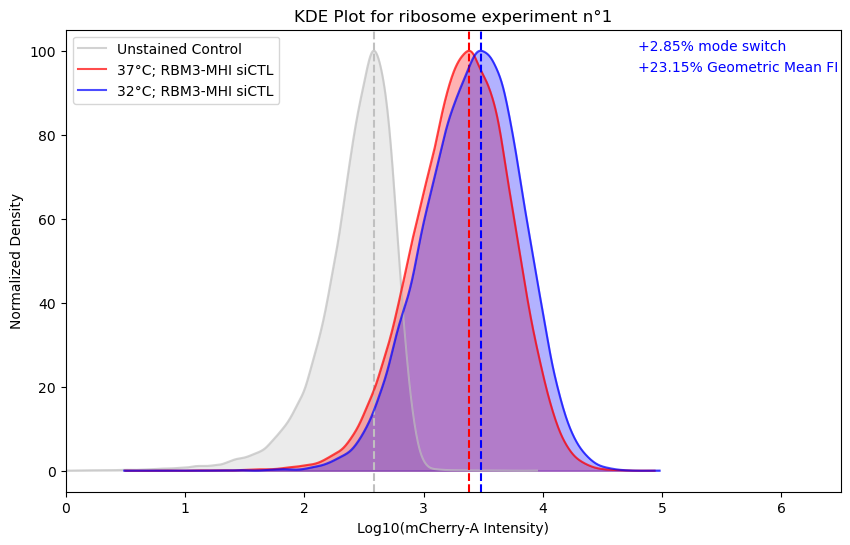

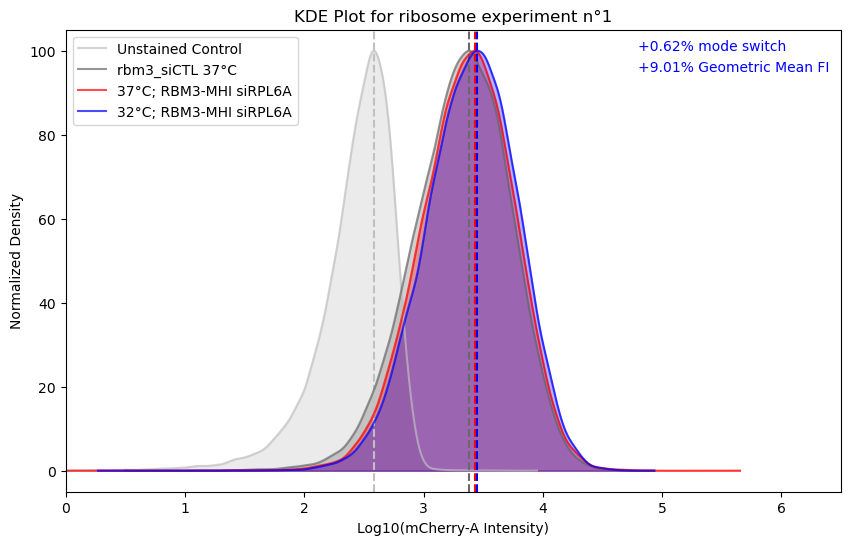

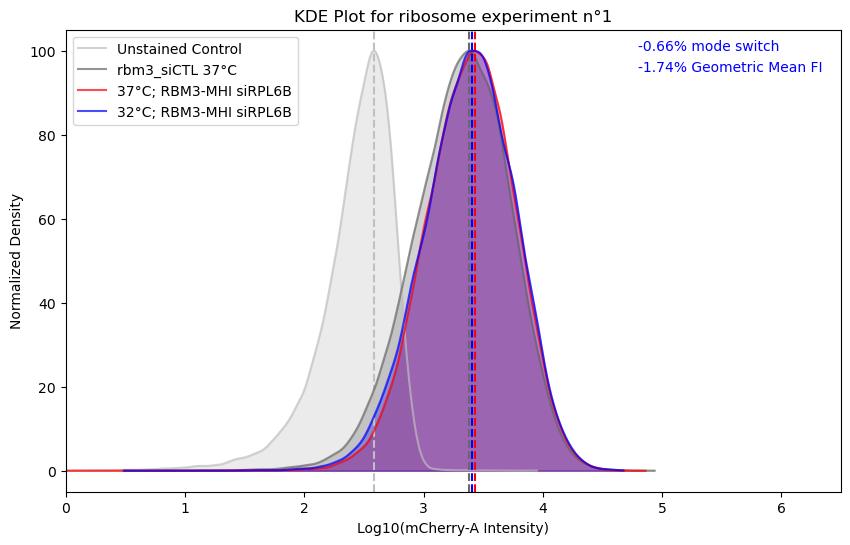

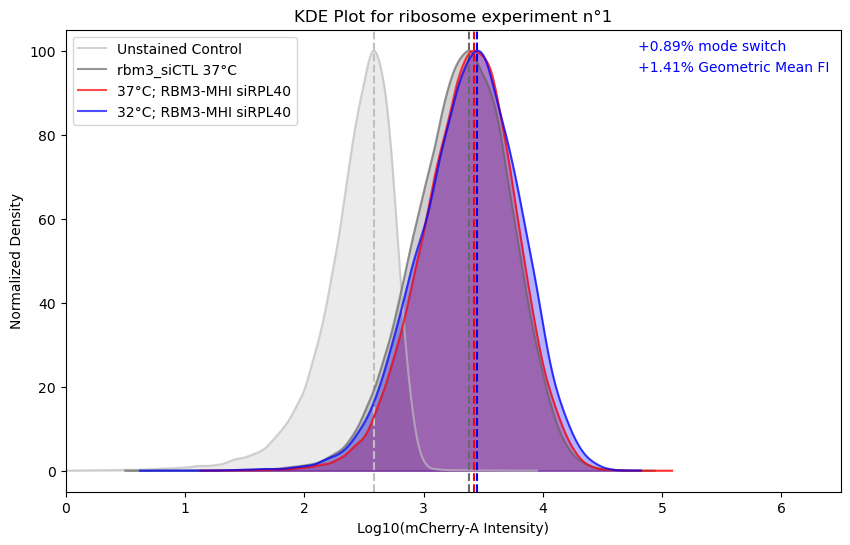

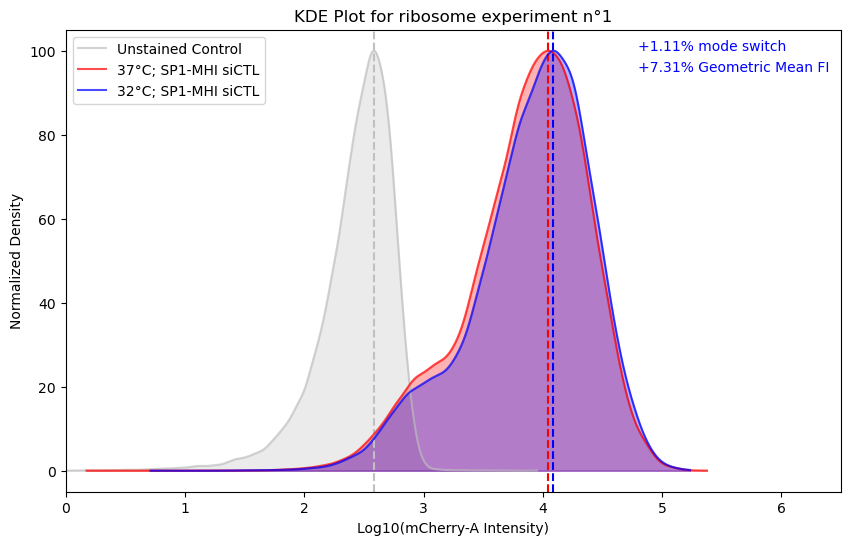

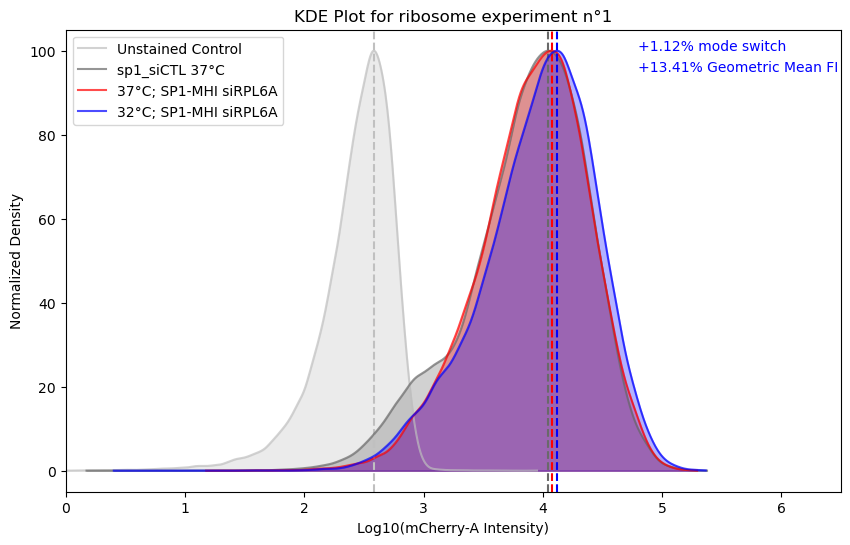

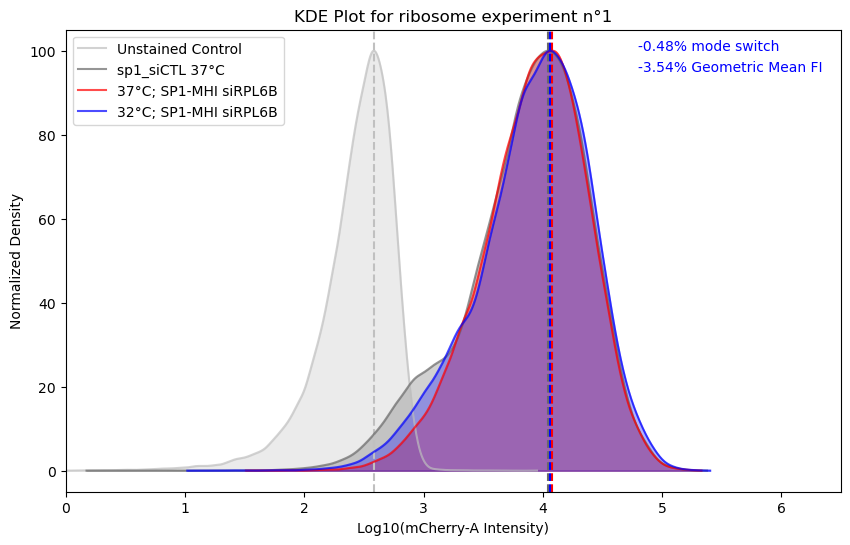

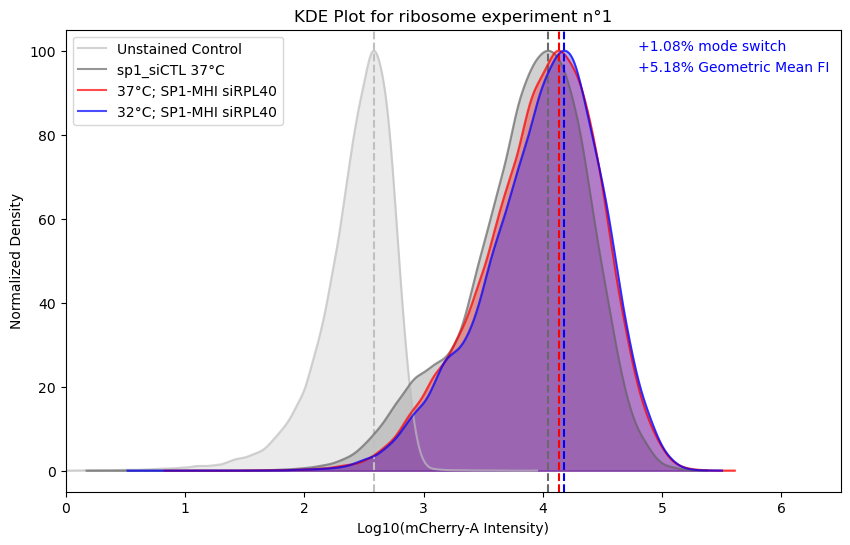

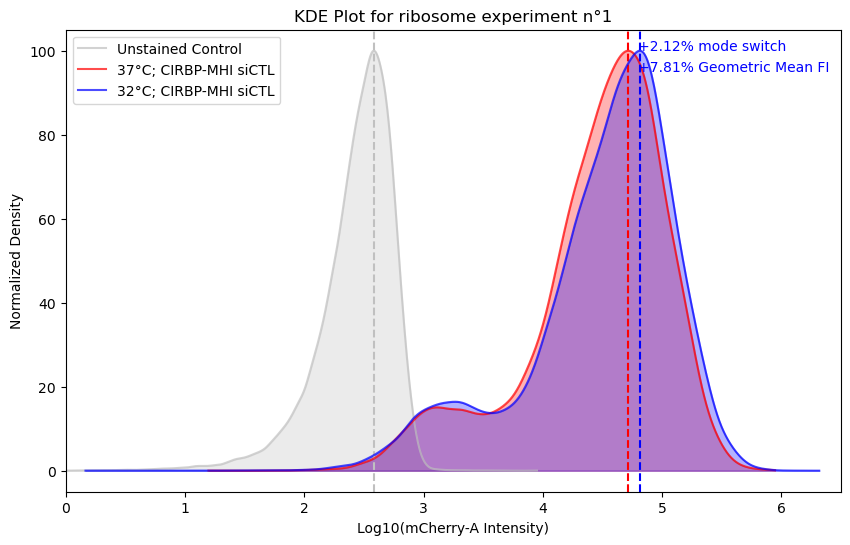

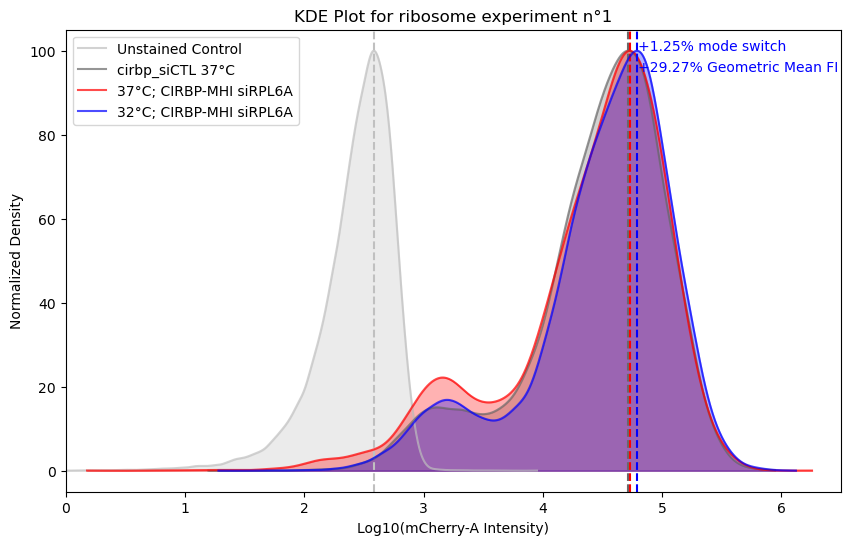

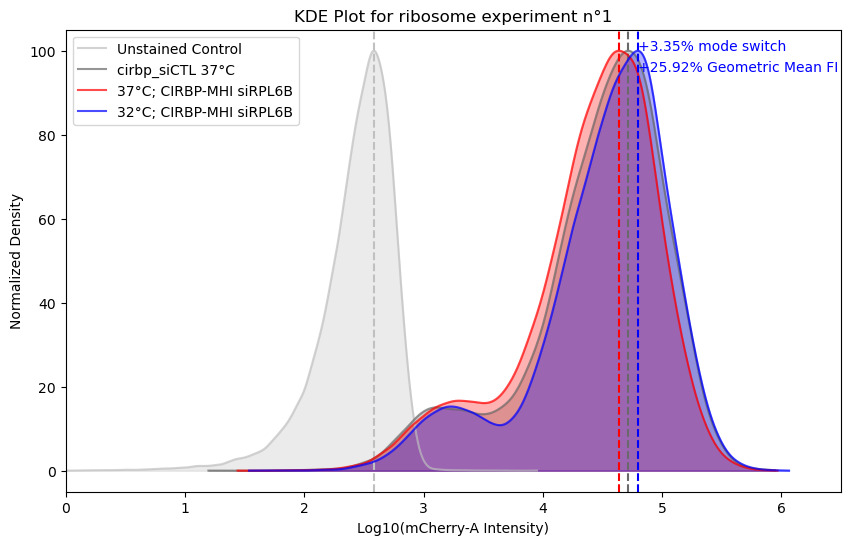

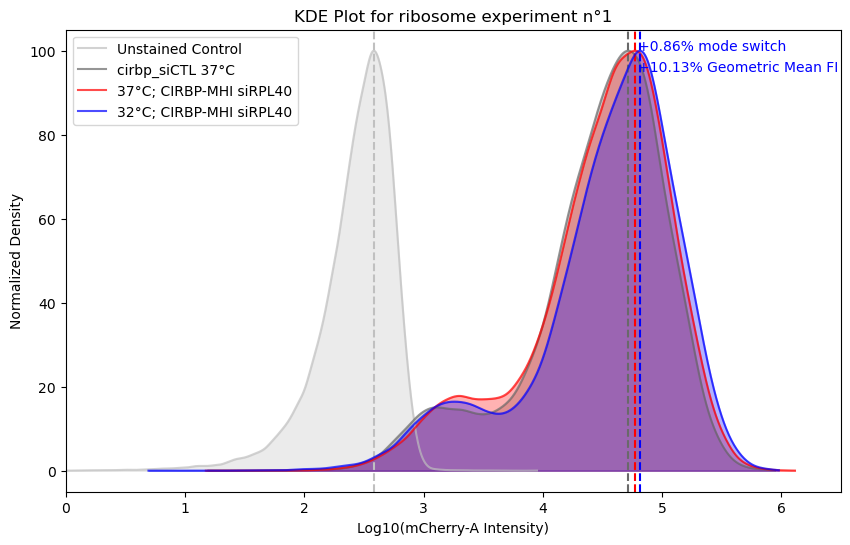

Missing samples are: []


In [20]:
# Define parameters
unstained_control = 'HEK293_Unstained_control'
temperatures = [37, 32]
MHIs = ['rbm3', 'sp1', 'cirbp']
conditions = ['ctl', 'rpl6a', 'rpl6b', 'rpl40']

# Loop over MHIs and conditions
missing_samples_l = []

for MHI in MHIs:
    for condition in conditions:
        fig = plt.figure(figsize=(10, 6))

        # Plot the Unstained control
        sample_control = df[df['label'] == unstained_control]
        process_and_plot(sample_control, 'silver', 'Unstained Control')
        
        # Plot condition_ctl_37
        if condition != 'ctl':
            sample_ctl_37 = df[df['label'] == f'{MHI}_ctl_37']
            process_and_plot(sample_ctl_37, 'dimgray', f'{MHI}_siCTL 37°C')      
              
        mode_32 = None
        mode_37 = None
        gMFI_32 = None
        gMFI_37 = None
        missing_sample = False
        
        for temp, color in zip(temperatures, ['red', 'blue']):
            label = f'{MHI}_{condition}_{temp}'
            sample = df[df['label'] == label]
            
            # if one sample is missing, stop
            if sample.empty:
                missing_samples_l.append(label)
                missing_sample = True
                break 
            
            # save mode value & gMFI value to calculate % later
            mode_value = process_and_plot(sample, color, f'{temp}°C')
            if temp == 32:
                mode_32 = mode_value
                gMFI_32 = df[df['label'] == label]['gMFI_ratio'].iloc[0]
            elif temp == 37:
                mode_37 = mode_value
                gMFI_37 = df[df['label'] == label]['gMFI_ratio'].iloc[0]
                
        # Close the plot if any sample is missing        
        if missing_sample:
            plt.close(fig)  
            continue
                
        # Calculate and annotate percentage change if both are available
        if mode_32 is not None and mode_37 is not None:
            mode_percent_change = ((mode_32 - mode_37) / mode_37) * 100
            plt.text(4.8, 100, f'{mode_percent_change:+.2f}% mode switch', color='blue', fontsize=10)

            mfi_percent_change = ((gMFI_32 - gMFI_37) / gMFI_37) * 100
            plt.text(4.8, 95, f'{mfi_percent_change:+.2f}% Geometric Mean FI', color='blue', fontsize=10)

        # Add labels and legend
        plt.xlabel('Log10(mCherry-A Intensity)')
        plt.ylabel('Normalized Density')
        plt.title(f'KDE Plot for {experiment}')
        plt.legend(loc='upper left')

        # Save the graph
        filename = f'{MHI}_{condition}_KDE_plot.png'
#         plt.savefig(filename)
        plt.show()
        plt.close(fig)

#print missing samples   
print(f'Missing samples are: {missing_samples_l}')